In [ ]:

from google.colab import files
uploaded = files.upload()

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.float_format', lambda x: f'{x:,.0f}')


Saving Scarped Zameen.com.xlsx to Scarped Zameen.com.xlsx


In [ ]:
# STEP 2: Load the uploaded Excel file

df = pd.read_excel('Scarped Zameen.com.xlsx')
df.head()


,Title,URL,City,Type,Area,Price,Purpose,Location,Description,Built in year,...,Nearby Schools,Nearby Hospitals,Nearby Shopping Malls,Nearby Restaurants,Distance From Airport (kms),Nearby Public Transport Service,Other Nearby Places,Maintenance Staff,Security Staff,Other Facilities
0,Hmr Waterfront 2 Bed Room Premium Apartment On...,https://www.zameen.com/Property/dha_phase_8_hm...,Karachi,Flat,128 Sq. Yd.,PKR\n4.75 Crore,For Sale,"DHA Defence, Karachi, Sindh",SAIMA MARINA RESIDENCE HMR WATERFRONT\nINVESTO...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Chance Deal! Luxury 2 Bedroom Seafront Apartme...,https://www.zameen.com/Property/dha_defence_dh...,Karachi,Flat,161 Sq. Yd.,PKR\n6.25 Crore,For Sale,"DHA Defence, Karachi, Sindh",Live the Seafront Dream at H&S Residence \n2 B...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Luxury 1 Bed At H& S Residence By Japanese Arc...,https://www.zameen.com/Property/dha_phase_8_hm...,Karachi,Flat,111 Sq. Yd.,PKR\n3.45 Crore,For Sale,"DHA Defence, Karachi, Sindh",Live the Seafront Dream at H&S Residence \n1 B...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Luxury 1 Bed Seafront Apartment at HMR waterfr...,https://www.zameen.com/Property/dha_phase_8_hm...,Karachi,Flat,106 Sq. Yd.,PKR\n2.98 Crore,For Sale,"DHA Defence, Karachi, Sindh",Chance Deal at HMR Waterfront 1-Bed Apartment ...,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2 Bed Apartment For Booking On 3 Years | Saima...,https://www.zameen.com/Property/dha_phase_8_hm...,Karachi,Flat,156 Sq. Yd.,PKR\n4.65 Crore,For Sale,"DHA Defence, Karachi, Sindh",HMR WATERFRONT \n\nOwn Your Dream Apartment in...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# STEP 3: Preview dataset structure

print("Shape:", df.shape)
df.info()
df.columns


Shape: (18255, 59)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18255 entries, 0 to 18254
Data columns (total 59 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Title                            18239 non-null  object 
 1   URL                              18255 non-null  object 
 2   City                             18255 non-null  object 
 3   Type                             18239 non-null  object 
 4   Area                             18239 non-null  object 
 5   Price                            18239 non-null  object 
 6   Purpose                          18239 non-null  object 
 7   Location                         18239 non-null  object 
 8   Description                      14893 non-null  object 
 9   Built in year                    11940 non-null  float64
 10  Parking Spaces                   9656 non-null   float64
 11  Double Glazed Windows            0 non-null      float64
 12 

Index(['Title', 'URL', 'City', 'Type', 'Area', 'Price', 'Purpose', 'Location',
       'Description', 'Built in year', 'Parking Spaces',
       'Double Glazed Windows', 'Central Air Conditioning', 'Central Heating',
       'Flooring', 'Electricity Backup', 'Waste Disposal', 'Floors',
       'Other Main Features', 'Furnished', 'Bedrooms', 'Bathrooms',
       'Servant Quarters', 'Drawing Room', 'Dining Room', 'Kitchens',
       'Study Room', 'Prayer Room', 'Powder Room', 'Store Rooms', 'Steam Room',
       'Lounge or Sitting Room', 'Laundry Room', 'Other Rooms',
       'Broadband Internet Access', 'Satellite or Cable TV Ready', 'Intercom',
       'Community Lawn or Garden', 'Community Swimming Pool', 'Community Gym',
       'First Aid or Medical Centre', 'Day Care Centre', 'Kids Play Area',
       'Barbeque Area', 'Mosque', 'Community Centre', 'Lawn or Garden',
       'Sauna', 'Jacuzzi', 'Nearby Schools', 'Nearby Hospitals',
       'Nearby Shopping Malls', 'Nearby Restaurants',
       'Di

In [ ]:
# STEP 4: Clean 'Price' column
df['Price'] = df['Price'].astype(str).str.replace('PKR', '').str.replace(',', '').str.strip()
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# Clean 'Area' and convert to sqft
def convert_area(area_str):
    try:
        val = float(area_str.split()[0])
        if 'marla' in area_str.lower():
            return val * 272.25
        elif 'kanal' in area_str.lower():
            return val * 5445
        elif 'sqft' in area_str.lower():
            return val
    except:
        return None

df['Area_sqft'] = df['Area'].astype(str).apply(convert_area)


In [ ]:
# STEP 5: Handle missing values in key numeric columns

df['Bedrooms'] = df['Bedrooms'].fillna(df['Bedrooms'].mode()[0])
df['Bathrooms'] = df['Bathrooms'].fillna(df['Bathrooms'].mode()[0])
df['Area_sqft'] = df['Area_sqft'].fillna(df['Area_sqft'].mean())

# Optional: Fill 'Built in year' with median year
if 'Built in year' in df.columns:
    df['Built in year'] = df['Built in year'].fillna(df['Built in year'].median())


In [ ]:
# STEP 6: Add price per square foot
df['Price_per_sqft'] = df['Price'] / df['Area_sqft']


**after step 6 i checked nan values for price and cleaned the price column format ,changed area sqyd to sqft, renamed Price to cleaned Price **

In [ ]:
# Step 1: Re-import the dataset and assign to df_raw
df_raw = pd.read_excel('Scarped Zameen.com.xlsx')

# Step 2: Check how many non-NaN values exist in the raw 'Price' column
print("Non-NaN values in Price:", df_raw['Price'].notna().sum())

# Step 3: Clean the 'Price' column that has 'PKR\nX Crore' format
def clean_price(value):
    try:
        value = value.replace('\n', ' ').replace('PKR', '').strip().lower()
        if 'crore' in value:
            num = float(value.split()[0])
            return num * 1e7
        elif 'lakh' in value:
            num = float(value.split()[0])
            return num * 1e5
        else:
            return pd.NA
    except:
        return pd.NA

df_raw['Price_Cleaned'] = df_raw['Price'].astype(str).apply(clean_price)

# Step 4: View summary of cleaned price
df_raw['Price_Cleaned'].describe()


Non-NaN values in Price: 18239


,Price_Cleaned
count,"14,668"
unique,904
top,"35,000,000"
freq,213


In [ ]:
df_raw = df_raw.rename(columns={'Price_Cleaned': 'Price'})


In [ ]:
# Function to convert 'Area' from square yards to square feet
def convert_sqyd_to_sqft(area_str):
    try:
        value = float(area_str.split()[0])
        return value * 9  # 1 sq yd = 9 sq ft
    except:
        return None

# Apply conversion
df_raw['Area_sqft'] = df_raw['Area'].astype(str).apply(convert_sqyd_to_sqft)

# Fill any missing area with mean value
df_raw['Area_sqft'] = df_raw['Area_sqft'].fillna(df_raw['Area_sqft'].mean())

df_raw[['Area', 'Area_sqft']].head()


,Area,Area_sqft
0,128 Sq. Yd.,"1,152"
1,161 Sq. Yd.,"1,449"
2,111 Sq. Yd.,999
3,106 Sq. Yd.,954
4,156 Sq. Yd.,"1,404"


In [ ]:
df_raw[['Price', 'Area_sqft']].isnull().sum()



,0
Price,16
Price,3587
Area_sqft,0


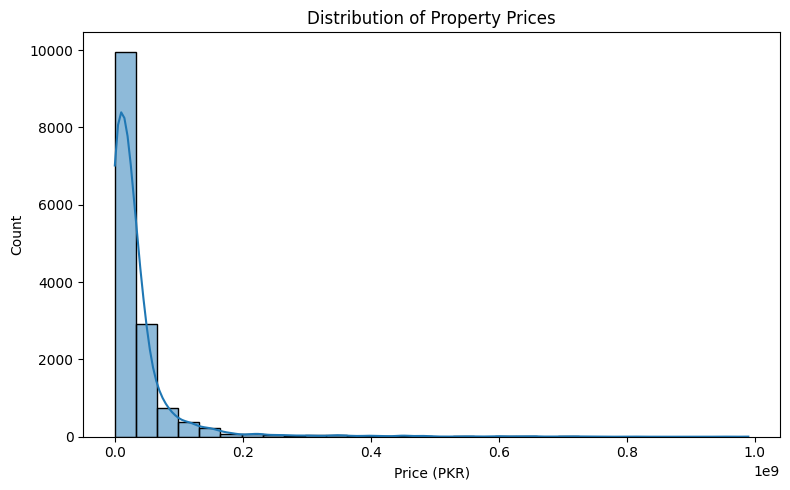

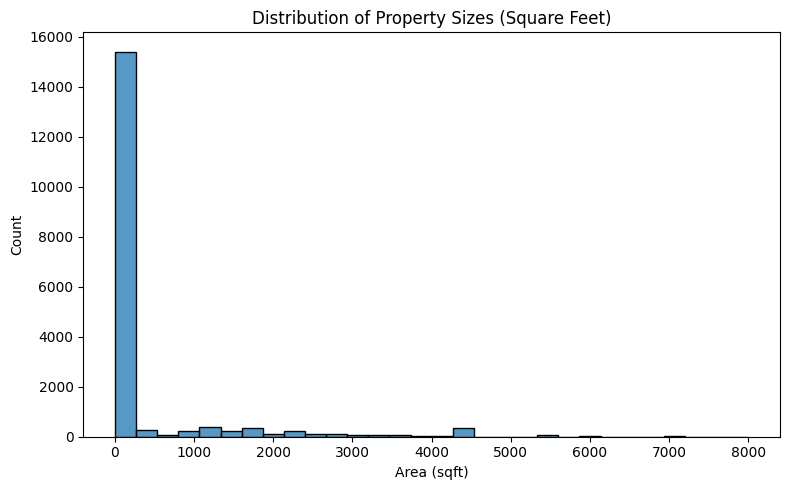

In [ ]:
# STEP 7: Univariate Distribution Plots


import matplotlib.pyplot as plt
import seaborn as sns

# Plot 1: Distribution of Property Prices (using Price_Cleaned)
plt.figure(figsize=(8, 5))
sns.histplot(df_raw['Price_Cleaned'].dropna().astype(float), bins=30, kde=True)
plt.title("Distribution of Property Prices")
plt.xlabel("Price (PKR)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Plot 2: Distribution of Property Sizes (using Area_sqft)
plt.figure(figsize=(8, 5))
sns.histplot(df_raw['Area_sqft'].dropna().astype(float), bins=30)
plt.title("Distribution of Property Sizes (Square Feet)")
plt.xlabel("Area (sqft)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


In [ ]:
df_raw['Price_Cleaned'] = pd.to_numeric(df_raw['Price_Cleaned'], errors='coerce')


In [ ]:
df_raw['Price_Cleaned'].describe()


,Price_Cleaned
count,"14,668"
mean,"36,635,746"
std,"67,361,417"
min,"100,000"
25%,"4,600,000"
50%,"20,000,000"
75%,"40,000,000"
max,"990,000,000"


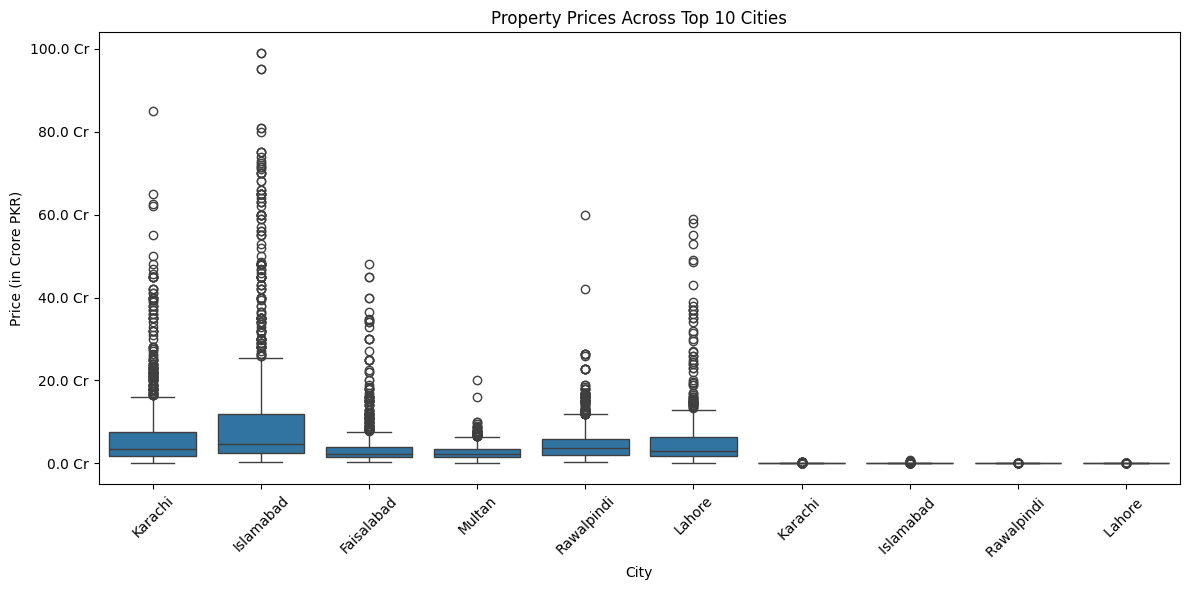

In [ ]:
# Step 8.1: Price vs City (Fixed with Y-axis in Crores)
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

# Filter top 10 cities and clean price
top_cities = df_raw['City'].value_counts().nlargest(10).index
plot_data = df_raw[df_raw['City'].isin(top_cities) & df_raw['Price_Cleaned'].notna()]

# Plot
sns.boxplot(x='City', y='Price_Cleaned', data=plot_data)

# Format y-axis in Crores
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x/1e7:.1f} Cr'))

plt.xticks(rotation=45)
plt.title("Property Prices Across Top 10 Cities")
plt.xlabel("City")
plt.ylabel("Price (in Crore PKR)")
plt.tight_layout()
plt.show()


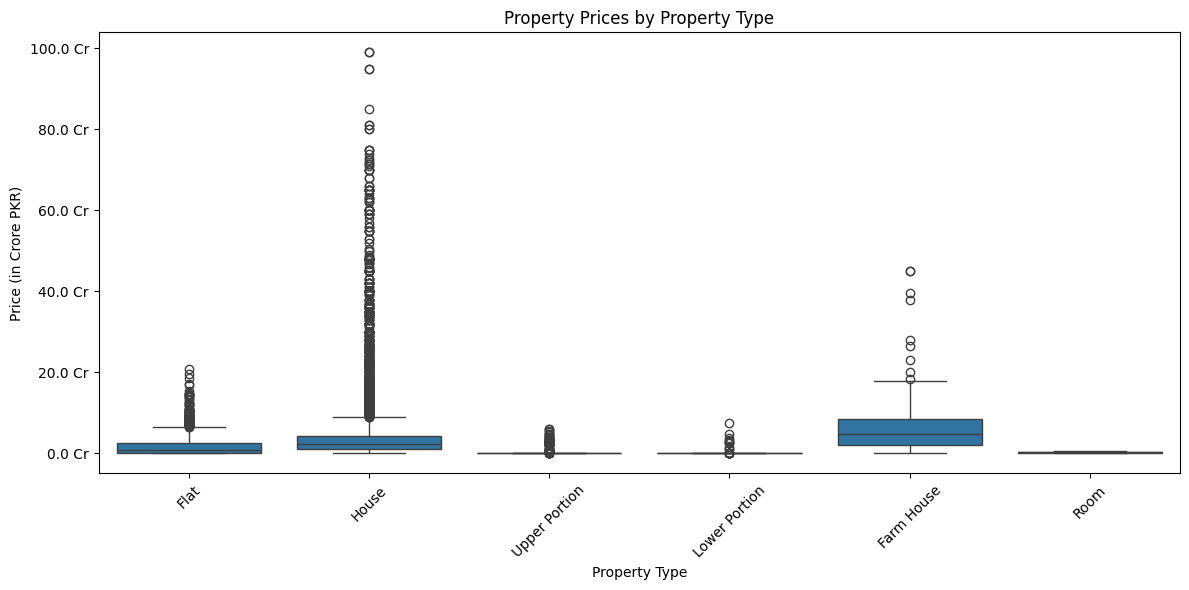

In [ ]:
# Step 8.2: Price vs Property Type
plt.figure(figsize=(12, 6))

# Pick top 6 most common property types
top_types = df_raw['Type'].value_counts().nlargest(6).index
plot_data = df_raw[df_raw['Type'].isin(top_types) & df_raw['Price_Cleaned'].notna()]

# Plot boxplot
sns.boxplot(x='Type', y='Price_Cleaned', data=plot_data)

# Format y-axis to show in Crores
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x/1e7:.1f} Cr'))

plt.xticks(rotation=45)
plt.title("Property Prices by Property Type")
plt.xlabel("Property Type")
plt.ylabel("Price (in Crore PKR)")
plt.tight_layout()
plt.show()


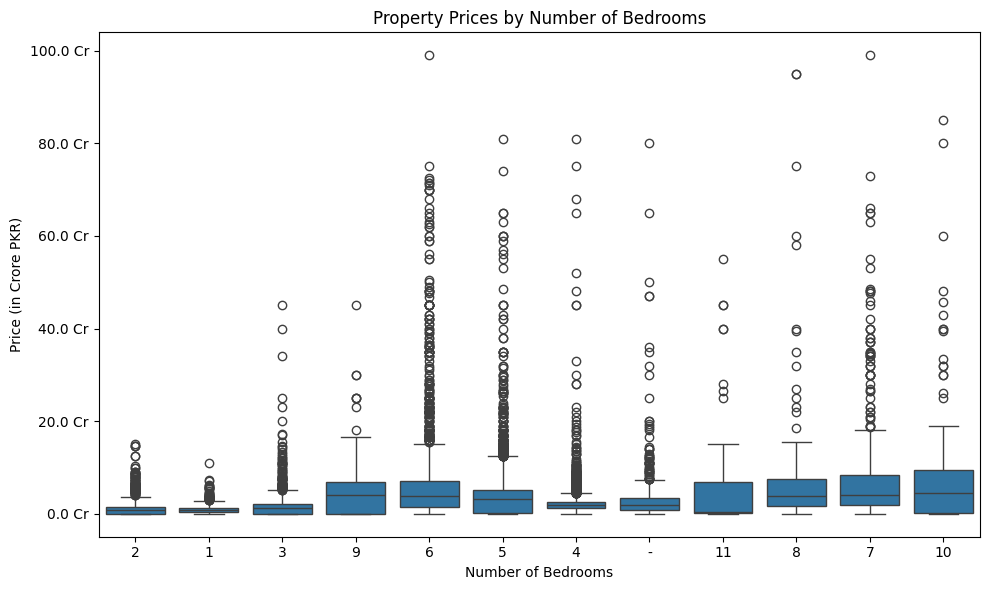

In [ ]:
# Step 8.3: Price vs Number of Bedrooms
plt.figure(figsize=(10, 6))

# Filter valid entries
plot_data = df_raw[df_raw['Price_Cleaned'].notna() & df_raw['Bedrooms'].notna()]

sns.boxplot(x='Bedrooms', y='Price_Cleaned', data=plot_data)

# Format y-axis
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x/1e7:.1f} Cr'))

plt.title("Property Prices by Number of Bedrooms")
plt.xlabel("Number of Bedrooms")
plt.ylabel("Price (in Crore PKR)")
plt.tight_layout()
plt.show()
